In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.losses = []

    def _sigmoid(self, z):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-z))

    def _compute_loss(self, y_true, y_pred):
        """Binary cross-entropy loss"""
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iterations):
            linear_pred = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(linear_pred)

            # Gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update params
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if i % 100 == 0:
                loss = self._compute_loss(y, y_pred)
                self.losses.append(loss)

    def predict_proba(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_pred)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)




In [22]:

# Generate binary classification dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=4,
                            n_informative=2, n_redundant=0, random_state=42)



In [23]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [24]:

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [30]:
# Train custom logistic regression
log_reg_scratch = LogisticRegressionScratch(learning_rate=0.001, n_iterations=50000)
log_reg_scratch.fit(X_train_scaled, y_train)



In [31]:
# Predictions
y_pred_scratch = log_reg_scratch.predict(X_test_scaled)




In [32]:
# Evaluate
print("Accuracy (from scratch):", accuracy_score(y_test, y_pred_scratch))



Accuracy (from scratch): 0.87


In [33]:
# Compare with sklearn
from sklearn.linear_model import LogisticRegression
log_reg_sklearn = LogisticRegression(max_iter=200000)
log_reg_sklearn.fit(X_train_scaled, y_train)
y_pred_sklearn = log_reg_sklearn.predict(X_test_scaled)
print("Accuracy (sklearn):", accuracy_score(y_test, y_pred_sklearn))



Accuracy (sklearn): 0.87


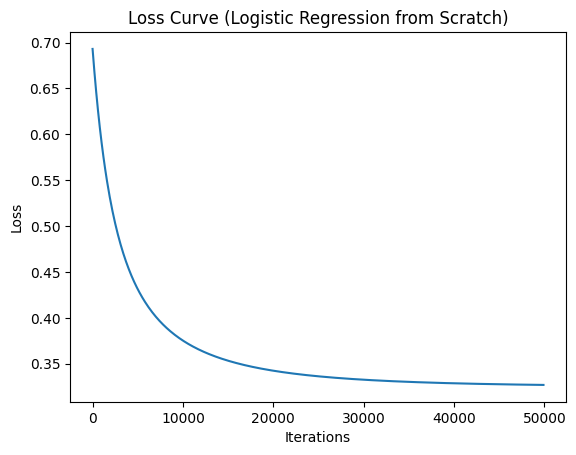

In [34]:
# Plot loss curve
plt.plot(range(0, log_reg_scratch.n_iterations, 100), log_reg_scratch.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Curve (Logistic Regression from Scratch)")
plt.show()